In [1]:
import pandas as pd
import pycaret
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('etfs_dataset_modelling.csv')

In [3]:
data.dropna(inplace=True)

In [4]:
#data = pd.DataFrame(data[data.Ticker == 'SSO'][['Close','Open']])

#### Preprocessing for Time Series

In [5]:
data = data.rename(columns={'Unnamed: 0': 'Series'})
data

,Series,Ticker,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,RSI_9,RSI_14,RSI_25,ewma_7,ewma_50,ewma_200,Close_target
25,25,FGDL,2022-08-05 00:00:00-04:00,23.820000,23.820000,23.768000,23.768000,210200.0,0.0,0.0,96.519827,57.326070,0.000000,23.655462,23.651515,23.995224,23.952000
26,26,FGDL,2022-08-08 00:00:00-04:00,23.900999,23.952000,23.900999,23.952000,200.0,0.0,0.0,100.000000,62.375775,0.000000,23.729596,23.663299,23.994794,24.049999
27,27,FGDL,2022-08-09 00:00:00-04:00,24.016001,24.070000,24.016001,24.049999,11300.0,0.0,0.0,100.000000,67.369977,38.395312,23.809697,23.678464,23.995344,23.975000
28,28,FGDL,2022-08-10 00:00:00-04:00,23.972000,23.975000,23.972000,23.975000,200.0,0.0,0.0,100.000000,78.593118,62.521736,23.851023,23.690093,23.995141,23.913000
29,29,FGDL,2022-08-11 00:00:00-04:00,23.913000,23.913000,23.913000,23.913000,0.0,0.0,0.0,100.000000,89.394880,72.365015,23.866517,23.698834,23.994324,24.110001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3571480,3571480,AUGT,2024-07-02 00:00:00-04:00,29.120001,29.195000,29.120001,29.195000,200.0,0.0,0.0,100.000000,100.000000,100.000000,29.097374,28.455972,26.980250,29.267000
3571481,3571481,AUGT,2024-07-03 00:00:00-04:00,29.221001,29.270000,29.180000,29.267000,2300.0,0.0,0.0,100.000000,100.000000,100.000000,29.139780,28.487777,27.003004,29.297001
3571482,3571482,AUGT,2024-07-05 00:00:00-04:00,29.240000,29.297001,29.240000,29.297001,500.0,0.0,0.0,100.000000,100.000000,100.000000,29.179086,28.519512,27.025830,29.332001
3571483,3571483,AUGT,2024-07-08 00:00:00-04:00,29.299999,29.340000,29.299999,29.332001,600.0,0.0,0.0,100.000000,100.000000,100.000000,29.217314,28.551374,27.048777,29.327000


##### Extraer fechas en formato que lean las series y eliminamos columnas no necesarias

In [6]:
data['Date'] = pd.to_datetime(data['Date'], utc=True)

data

,Series,Ticker,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,RSI_9,RSI_14,RSI_25,ewma_7,ewma_50,ewma_200,Close_target
25,25,FGDL,2022-08-05 04:00:00+00:00,23.820000,23.820000,23.768000,23.768000,210200.0,0.0,0.0,96.519827,57.326070,0.000000,23.655462,23.651515,23.995224,23.952000
26,26,FGDL,2022-08-08 04:00:00+00:00,23.900999,23.952000,23.900999,23.952000,200.0,0.0,0.0,100.000000,62.375775,0.000000,23.729596,23.663299,23.994794,24.049999
27,27,FGDL,2022-08-09 04:00:00+00:00,24.016001,24.070000,24.016001,24.049999,11300.0,0.0,0.0,100.000000,67.369977,38.395312,23.809697,23.678464,23.995344,23.975000
28,28,FGDL,2022-08-10 04:00:00+00:00,23.972000,23.975000,23.972000,23.975000,200.0,0.0,0.0,100.000000,78.593118,62.521736,23.851023,23.690093,23.995141,23.913000
29,29,FGDL,2022-08-11 04:00:00+00:00,23.913000,23.913000,23.913000,23.913000,0.0,0.0,0.0,100.000000,89.394880,72.365015,23.866517,23.698834,23.994324,24.110001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3571480,3571480,AUGT,2024-07-02 04:00:00+00:00,29.120001,29.195000,29.120001,29.195000,200.0,0.0,0.0,100.000000,100.000000,100.000000,29.097374,28.455972,26.980250,29.267000
3571481,3571481,AUGT,2024-07-03 04:00:00+00:00,29.221001,29.270000,29.180000,29.267000,2300.0,0.0,0.0,100.000000,100.000000,100.000000,29.139780,28.487777,27.003004,29.297001
3571482,3571482,AUGT,2024-07-05 04:00:00+00:00,29.240000,29.297001,29.240000,29.297001,500.0,0.0,0.0,100.000000,100.000000,100.000000,29.179086,28.519512,27.025830,29.332001
3571483,3571483,AUGT,2024-07-08 04:00:00+00:00,29.299999,29.340000,29.299999,29.332001,600.0,0.0,0.0,100.000000,100.000000,100.000000,29.217314,28.551374,27.048777,29.327000


In [7]:
data['Date'] = data['Date'].dt.date

In [8]:
data = data[['Date', 'Close','Ticker']] 

data.head()

,Date,Close,Ticker
25,2022-08-05,23.768000,FGDL
26,2022-08-08,23.952000,FGDL
27,2022-08-09,24.049999,FGDL
28,2022-08-10,23.975000,FGDL
29,2022-08-11,23.913000,FGDL


##### 
Primero separamos el dataset por Ticker. Nos devuelve una lista de tuplas que contienen el nombre del Ticker en 0, y el dataframe en 1.


In [9]:
prueba = [data for data in data.groupby('Ticker')]
prueba[0][1].drop('Ticker', inplace=True, axis=1)
prueba = prueba[0][1]
prueba


,Date,Close
1173759,2020-10-14,24.703897
1173760,2020-10-15,24.703897
1173761,2020-10-16,24.703897
1173762,2020-10-19,24.698940
1173763,2020-10-20,24.703897
...,...,...
1174692,2024-07-02,25.049999
1174693,2024-07-03,25.049999
1174694,2024-07-05,25.056000
1174695,2024-07-08,25.059999


##### Date está como objeto y deberia estar como índice, por eso tengo problemas

In [10]:
prueba.dtypes

Date      object
Close    float64
dtype: object

In [11]:
prueba['Date'] = pd.to_datetime(prueba['Date'])


In [12]:
prueba.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [13]:
prueba.set_index('Date', inplace=True)

In [14]:
full_range = pd.date_range(start=prueba.index.min(), end=prueba.index.max(), freq='D')

In [15]:
full_range

DatetimeIndex(['2020-10-14', '2020-10-15', '2020-10-16', '2020-10-17',
               '2020-10-18', '2020-10-19', '2020-10-20', '2020-10-21',
               '2020-10-22', '2020-10-23',
               ...
               '2024-06-30', '2024-07-01', '2024-07-02', '2024-07-03',
               '2024-07-04', '2024-07-05', '2024-07-06', '2024-07-07',
               '2024-07-08', '2024-07-09'],
              dtype='datetime64[ns]', length=1365, freq='D')

In [16]:
prueba = prueba.reindex(full_range)

In [17]:
prueba.dtypes

Close    float64
dtype: object

##### Como ahora hay valores NaN, debemos imputarlos. Lo más usado es la interpolacion

In [18]:
prueba.isnull().sum()

Close    427
dtype: int64

In [19]:
prueba_interpolated = prueba.interpolate()

In [20]:
prueba_interpolated.head(20)

,Close
2020-10-14,24.703897
2020-10-15,24.703897
2020-10-16,24.703897
2020-10-17,24.702245
2020-10-18,24.700593
2020-10-19,24.698940
2020-10-20,24.703897
2020-10-21,24.743572
2020-10-22,24.728693
2020-10-23,24.748526


<Axes: >

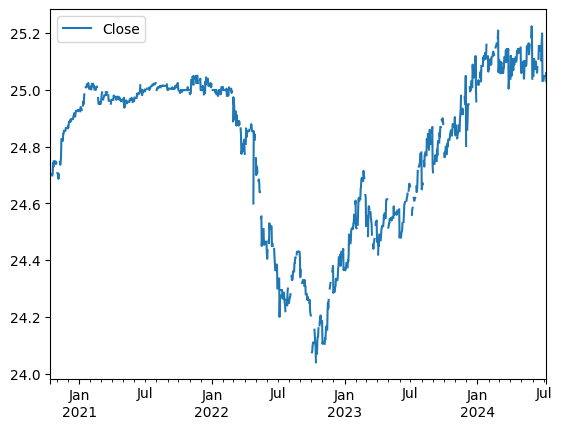

In [21]:
prueba.plot()

<Axes: >

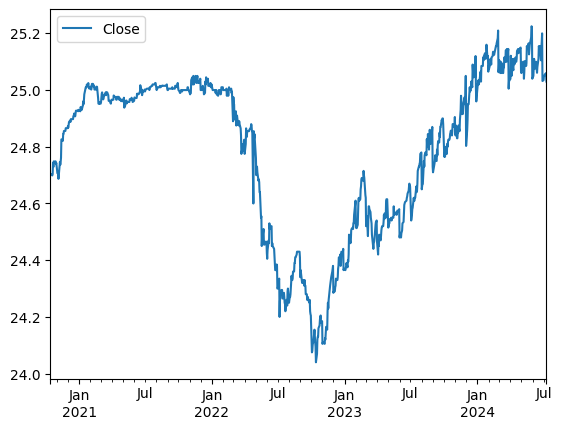

In [22]:
prueba_interpolated.plot()

In [23]:
print("\nDataFrame con Frecuencia Diaria Añadida:")
print(prueba_interpolated)
print("Frecuencia del índice actual:", prueba_interpolated.index.freq)


DataFrame con Frecuencia Diaria Añadida:
                Close
2020-10-14  24.703897
2020-10-15  24.703897
2020-10-16  24.703897
2020-10-17  24.702245
2020-10-18  24.700593
...               ...
2024-07-05  25.056000
2024-07-06  25.057333
2024-07-07  25.058666
2024-07-08  25.059999
2024-07-09  25.030001

[1365 rows x 1 columns]
Frecuencia del índice actual: <Day>


In [24]:
prueba_interpolated.values

array([[24.70389748],
       [24.70389748],
       [24.70389748],
       ...,
       [25.05866623],
       [25.05999947],
       [25.03000069]])

In [25]:
from pycaret.time_series import *
from pycaret.time_series import TSForecastingExperiment
from functions import *
import numpy as np

In [26]:
s = setup(data = prueba_interpolated, fh=30, fold=3, session_id=123)

,Description,Value
0,session_id,123
1,Target,Close
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(1365, 1)"
5,Transformed data shape,"(1365, 1)"
6,Transformed train set shape,"(1335, 1)"
7,Transformed test set shape,"(30, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [32]:
exp = TSForecastingExperiment()
exp.setup(prueba_interpolated, fh=30, fold=3, session_id=123)

,Description,Value
0,session_id,123
1,Target,Close
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(1365, 1)"
5,Transformed data shape,"(1365, 1)"
6,Transformed train set shape,"(1335, 1)"
7,Transformed test set shape,"(30, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [33]:
exp.check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,1365.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,24.792577
3,Summary,Statistics,Transformed,Median,,24.897999
4,Summary,Statistics,Transformed,Standard Deviation,,0.282727
5,Summary,Statistics,Transformed,Variance,,0.079935
6,Summary,Statistics,Transformed,Kurtosis,,-0.591911
7,Summary,Statistics,Transformed,Skewness,,-0.773744
8,Summary,Statistics,Transformed,# Distinct Values,,606.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",30924.307831


In [29]:
exp.plot_model(plot='cv')

In [30]:
best = exp.compare_models(exclude='auto_arima', sort='R2')

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,0.4706,0.4292,0.0344,0.0436,0.0014,0.0014,-0.1517,1.2567
exp_smooth,Exponential Smoothing,0.4748,0.4260,0.0348,0.0433,0.0014,0.0014,-0.1547,0.1433
ets,ETS,0.4749,0.4262,0.0348,0.0433,0.0014,0.0014,-0.1560,1.0233
catboost_cds_dt,CatBoost Regressor w/ Cond. Deseasonalize & Detrending,0.4688,0.4256,0.0344,0.0433,0.0014,0.0014,-0.1575,5.3833
theta,Theta Forecaster,0.4782,0.4435,0.0350,0.0451,0.0014,0.0014,-0.2471,0.0233
naive,Naive Forecaster,0.5157,0.4427,0.0378,0.0450,0.0015,0.0015,-0.2651,1.9000
dt_cds_dt,Decision Tree w/ Cond. Deseasonalize & Detrending,0.5223,0.4447,0.0383,0.0452,0.0015,0.0015,-0.2949,0.9767
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,0.5350,0.4563,0.0392,0.0464,0.0016,0.0016,-0.3216,2.6067
croston,Croston,0.5095,0.4455,0.0373,0.0453,0.0015,0.0015,-0.3222,0.0133
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.5039,0.4599,0.0369,0.0468,0.0015,0.0015,-0.3556,0.7633


In [31]:
exp.plot_model(best, plot='forecast')
